#Setup

In [2]:
# Mounting Google Drive locally
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Navigate to folder containing project
import os
os.chdir("drive/My Drive/COMP 551 Project 4/")

#Xception on CIFAR 10


In [4]:
# Import datasets directly from keras 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications.xception import Xception 
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Input
from tensorflow.keras.callbacks import CSVLogger

In [5]:
# Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 13s 0us/step


In [0]:
from google.colab.patches import cv2_imshow
# Function to show a single image 
def show_single_picture(img):
    """ Plot an image """
    cv2_imshow(img*255)

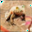

In [6]:
# Peek image
show_single_picture(x_train[0])

In [0]:
# Save data properties 
img_size = x_train[0].shape[0]
num_channels = x_train[0].shape[2]

In [0]:
# Experimental data
EPOCHS = 50
batch_sizes = [16, 32, 48, 64, 80, 96, 112, 128, 144, 160, 176, 192, 208, 224, 240, 256, 272, 288, 304, 320]
bs_simplified = [16, 32, 64, 96, 128, 160, 192, 224, 256, 320]
bs = bs_simplified[0]
learning_rates =  [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.20]
lr_simplified = [0.02,0.075,0.10,0.125,0.15,0.175,0.2]
# lr = learning_rates[9]

In [10]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6200171977576391586
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 2394414942946844085
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 2518487930018526901
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7470045594
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15173144876282151669
physical_device_desc: "device: 0, name: Tesla P4, pci bus id: 0000:00:04.0, compute capability: 6.1"
]


In [0]:
# Looping over batch sizes using fixed learning rate 
for lr in lr_simplified:
  print("Batch Size: {}\nLearning Rate: {}".format(bs, lr))
  # Create ResNet model
  xception = Xception(weights='imagenet', include_top=True, input_tensor=Input(shape=(img_size,img_size,num_channels)))
  
  # Customize SGD optimizer with Generalization Bound 
  sgd = optimizers.SGD(lr=lr, momentum=0.0, nesterov=False)

  # Compile the model (should be done ***after*** setting layers to non-trainable)
  xception.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=["accuracy"])

  # Print a summary of the model
  xception.summary()

  # Create a CSV Logger
  csv_logger = CSVLogger("Results/XceptionCIFAR10/batch_size{}_learning_rate{}.csv".format(bs, lr), separator=',', append=False)

  # Train ResNet using fix learning rate for multiple batch size 
  history = xception.fit(x=x_train, y=y_train, validation_data=(x_test, y_test),batch_size=bs, epochs=EPOCHS, verbose=1, use_multiprocessing=True, callbacks=[csv_logger])

Batch Size: 16
Learning Rate: 0.02
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
91889664/91884032 [==============================] - 8s 0us/step
Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 15, 15, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 15, 15, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_co

In [0]:
# Looping over batch sizes using fixed learning rate 
for lr in lr_simplified[:2]:
  print("Batch Size: {}\nLearning Rate: {}".format(bs, lr))
  # Create ResNet model
  xception = Xception(weights='imagenet', include_top=True, input_tensor=Input(shape=(img_size,img_size,num_channels)))
  
  # Customize SGD optimizer with Generalization Bound 
  sgd = optimizers.SGD(lr=lr, momentum=0.0, nesterov=False)

  # Compile the model (should be done ***after*** setting layers to non-trainable)
  xception.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=["accuracy"])

  # Print a summary of the model
  xception.summary()

  # Create a CSV Logger
  csv_logger = CSVLogger("Results/XceptionCIFAR10/batch_size{}_learning_rate{}.csv".format(bs, lr), separator=',', append=False)

  # Train ResNet using fix learning rate for multiple batch size 
  history = xception.fit(x=x_train, y=y_train, validation_data=(x_test, y_test),batch_size=bs, epochs=EPOCHS, verbose=1, use_multiprocessing=True, callbacks=[csv_logger])